In [1]:
import warnings
warnings.simplefilter("ignore")
import logging
logging.getLogger('moviepy').setLevel(logging.WARNING)

#  Práctica 2.<font color='#CD5C5C'>  Imagen y video    </font>
## Detección de puntos de atención visual

####  <font color='#F5BCA9 '> Realizado por: Ixchel Dafne Avendaño Pacheco  </font>

#### Matricula: 23265456

##   <font color='#F5BCA9 '> Análisis </font>  <font color='#CD5C5C '>  Exploratorio </font> Vídeo


Cargamos las librerias necesarias 

In [2]:
import cv2
import pandas as pd
import matplotlib.pyplot as plt
import mediapipe as mp

Primero,  vamos a observar el reconocimiento de rostros. Se va a trabajar con tres imagenes en donde los Puntos de Atención Visual (PAV) estan situados hacia diferentes lados, los cuales son: FRENTE, DERECHA, IZQUIERDA.






Mediapipe es la librería principal de MediaPipe que proporciona acceso a diferentes soluciones, incluyendo la detección de rostros.

mp_face_detection se utiliza para acceder a la solución de detección de rostros.
mp_drawing se utiliza para acceder a las funciones de dibujo.

La función mp_face_detection.FaceDetection() crea un objeto detector de rostros.
El argumento model_selection=1 indica que se usará el modelo de detección precisa.
El argumento min_detection_confidence=0.5 indica que solo se detectarán rostros con una confianza superior al 50%.

In [3]:
mp_face_detection = mp.solutions.face_detection
mp_drawing = mp.solutions.drawing_utils

# Inicializar el detector de rostros. Usaremos el modelo de detección precisa en este ejemplo.
face_detection = mp_face_detection.FaceDetection(model_selection=1, min_detection_confidence=0.5)

Se cargan las 3 imagenes:
1. PAV Frente 
2. PAV Derecha 
3. PAV Izquierda


In [4]:
image_path1 = './Videos/AE/DAFNE.png'  
image1 = cv2.imread(image_path1)
image_rgb1 = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)

image_path2 = './Videos/AE/DAFNE1.png'  
image2 = cv2.imread(image_path2)
image_rgb2 = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)

image_path3 = './Videos/AE/DAFNE2.png'  
image3 = cv2.imread(image_path3)
image_rgb3 = cv2.cvtColor(image3, cv2.COLOR_BGR2RGB)


Se procesan las tres imágenes.


Se utiliza face_detection.process() para procesar una imagen en formato RGB.
Esta función ejecuta el modelo de detección de rostros en la imagen para identificar cualquier rostro presente.

En las variables results se almacenan objetos que contienen información sobre los rostros detectados en la imagen. Esta información  incluye:

1. El número de rostros detectados.
2. Para cada rostro:
3. Una caja delimitadora que define la ubicación del rostro (coordenadas de la esquina superior izquierda y la esquina inferior derecha).
4. La puntuación de confianza en la detección del rostro (probabilidad de que sea un rostro real).

In [5]:
results1 = face_detection.process(image_rgb1)
results2 = face_detection.process(image_rgb2)
results3 = face_detection.process(image_rgb3)

Cada if verifica si la variable results correspondiente  tiene un atributo llamado detections.
Si detections existe y no está vacío (significa que se detectaron rostros), el código dentro del if se ejecuta.

Si hay detecciones, el código entra al ciclo for.
La variable detection en cada iteración representa una instancia de la clase Detection de MediaPipe, que contiene información sobre un rostro individual detectado.

La función mp_drawing.draw_detection(image, detection) se usa para dibujar una caja delimitadora alrededor del rostro detectado en la imagen correspondiente (image1, image2, o image3).

In [6]:
if results1.detections:
    for detection in results1.detections:
        mp_drawing.draw_detection(image1, detection)
        
if results2.detections:
    for detection in results2.detections:
        mp_drawing.draw_detection(image2, detection)

if results3.detections:
    for detection in results3.detections:
        mp_drawing.draw_detection(image3, detection)


A continuación se muestran las tres imágenes resultantes. 

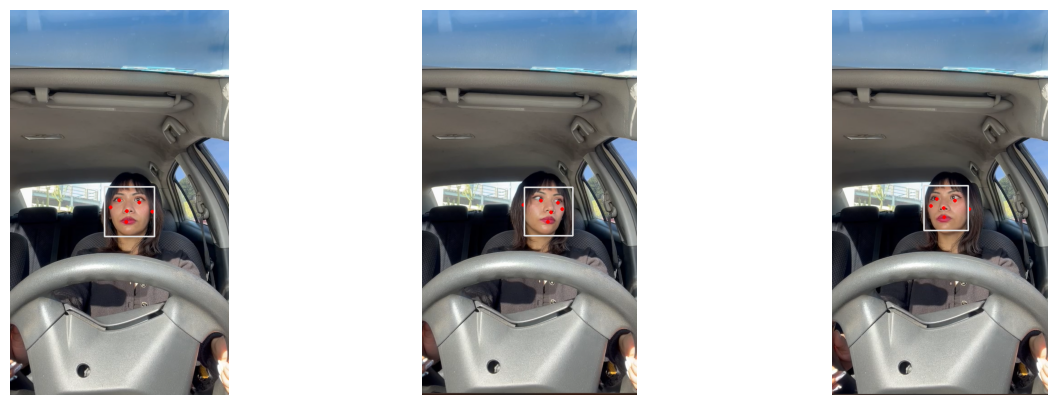

In [7]:
# Crea una figura con 3 subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Muestra la primera imagen en el subplot 1
plt.subplot(131)
plt.imshow(cv2.cvtColor(image1, cv2.COLOR_BGR2RGB))
plt.axis('off')

# Muestra la segunda imagen en el subplot 2
plt.subplot(132)
plt.imshow(cv2.cvtColor(image2, cv2.COLOR_BGR2RGB))
plt.axis('off')

# Muestra la tercera imagen en el subplot 3
plt.subplot(133)
plt.imshow(cv2.cvtColor(image3, cv2.COLOR_BGR2RGB))
plt.axis('off')

# Muestra la figura
plt.show()

Este código toma una imagen como entrada y devuelve una imagen con rectángulos que rodean las caras que ha detectado.

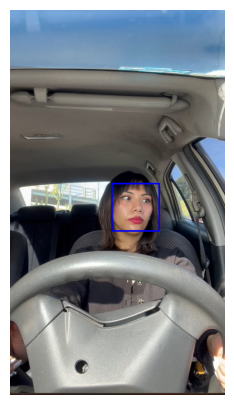

In [8]:
# Cargar el clasificador preentrenado para caras
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Leer la imagen
image = cv2.imread('./Videos/AE/DAFNE1.png')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Detectar caras en la imagen
faces = face_cascade.detectMultiScale(gray, 1.1, 4)

# Dibujar rectángulos alrededor de las caras detectadas
for (x, y, w, h) in faces:
    cv2.rectangle(image, (x, y), (x+w, y+h), (255, 0, 0), 2)

# Muestra la imagen con los rostros detectados
plt.figure(figsize=(5, 5))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

Iniciemos almacenando solo el bounding box (relativo a la imagen):
Es codigo realiza: 1. Carga una imagen. 2. Detecta rostros en la imagen usando la biblioteca MediaPipe. 3. Extrae información sobre las posiciones y dimensiones de los rostros detectados. 4. Guarda esta información en un archivo CSV para su posterior análisis o uso.

In [9]:
mp_face_detection = mp.solutions.face_detection
mp_drawing = mp.solutions.drawing_utils

# Función para procesar la imagen y almacenar detecciones
def process_image(image_path, csv_filename="./Videos/AE/DAFNE1.csv"):
    image = cv2.imread(image_path)
    if image is None:
        print(f"No se pudo cargar la imagen desde {image_path}.")
        return
    
    # Convertir la imagen de BGR a RGB
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    detections_data = []

    with mp_face_detection.FaceDetection(model_selection=1, min_detection_confidence=0.5) as face_detection:
        # Realizar detección de rostros
        results = face_detection.process(image)

        # Extraer información de la detección
        if results.detections:
            for detection in results.detections:
                bboxC = detection.location_data.relative_bounding_box
                xmin = bboxC.xmin
                ymin = bboxC.ymin
                width = bboxC.width
                height = bboxC.height
                
                detections_data.append({
                    "xmin": xmin,
                    "ymin": ymin,
                    "width": width,
                    "height": height
                })

    # Convertir los datos en un DataFrame y guardar en un CSV
    df = pd.DataFrame(detections_data)
    df.to_csv(csv_filename, index=False)
    print(f"Detections stored in {csv_filename}")

# Llamar a la función con la ruta a tu imagen
process_image('./Videos/AE/DAFNE1.png')

Detections stored in ./Videos/AE/DAFNE1.csv


Ahora los landmarks relativos al bounding box:

Este código extrae las coordenadas de los landmarks faciales (puntos clave) de cada rostro detectado. Además guarda las coordenadas de los landmarks en unidades relativas al tamaño del rectángulo delimitador del rostro. Esto permite que la información sea más adaptable a diferentes tamaños de rostros.

In [10]:
mp_face_detection = mp.solutions.face_detection

# Función para procesar la imagen y almacenar detecciones y landmarks relativos
def process_image(image_path, csv_filename="./Videos/AE/landmarks_image.csv"):
    image = cv2.imread(image_path)
    if image is None:
        print("Error al cargar la imagen.")
        return
    
    # Convertir la imagen de BGR a RGB
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    h, w, _ = image.shape  # Altura y anchura de la imagen para cálculos relativos

    detections_data = []

    with mp_face_detection.FaceDetection(model_selection=1, min_detection_confidence=0.5) as face_detection:
        results = face_detection.process(image)

        # Extraer información de la detección y los landmarks
        if results.detections:
            for detection in results.detections:
                bboxC = detection.location_data.relative_bounding_box
                xmin = bboxC.xmin
                ymin = bboxC.ymin
                width = bboxC.width
                height = bboxC.height

                # Inicializar un diccionario para almacenar las coordenadas de los landmarks relativos al bounding box
                landmarks_relative = {}

                # Extraer landmarks
                keypoints = detection.location_data.relative_keypoints
                for i, keypoint in enumerate(keypoints):
                    # Calcular coordenadas relativas dentro del bounding box
                    relative_x = (keypoint.x - xmin) / width
                    relative_y = (keypoint.y - ymin) / height

                    # Asumiendo que quieres nombrar cada landmark según su índice
                    landmarks_relative[f"landmark_{i}_x"] = relative_x
                    landmarks_relative[f"landmark_{i}_y"] = relative_y                                                
                
                detection_data = {
                    "xmin": xmin,
                    "ymin": ymin,
                    "width": width,
                    "height": height,
                }
                
                detection_data.update(landmarks_relative)
                detections_data.append(detection_data)

    df = pd.DataFrame(detections_data)
    df.to_csv(csv_filename, index=False)
    print(f"Detections and relative landmarks stored in {csv_filename}")

# Llamar a la función con la ruta a tu imagen
process_image('./Videos/AE/DAFNE1.png')

Detections and relative landmarks stored in ./Videos/AE/landmarks_image.csv


### Face mesh landmarks

In [11]:
mp_face_detection = mp.solutions.face_detection
mp_drawing = mp.solutions.drawing_utils

# Inicializar el detector de rostros. Usaremos el modelo de detección precisa en este ejemplo.
face_detection = mp_face_detection.FaceDetection(model_selection=1, min_detection_confidence=0.5)

video_path = './Videos/Crudos/DAFNE.mp4'  # Reemplaza esto con la ruta a tu video
cap = cv2.VideoCapture(video_path)

if not cap.isOpened():
    print("Error al abrir el video")
else:
    with mp_face_detection.FaceDetection(model_selection=1, min_detection_confidence=0.5) as face_detection:
        while True:
            success, image = cap.read()
            if not success:
                print("Fin del video.")  # Indica el fin del video y sale del bucle
                break

            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            image.flags.writeable = False

            results = face_detection.process(image)

            image.flags.writeable = True
            image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
            if results.detections:
                for detection in results.detections:
                    mp_drawing.draw_detection(image, detection)

            cv2.imshow('Face Detection in Video', image)

            if cv2.waitKey(1) & 0xFF == ord('q'):  # Permite la opción de terminar prematuramente con la tecla 'q'
                break

    cap.release()
    cv2.destroyAllWindows()

### Face mesh landmarks

Este código analiza cada frame de un video, detecta rostros en cada frame y los dibuja sobre la imagen original. Finalmente, muestra la imagen con los rostros detectados.

Información extraída:	Coordenadas del bounding box y landmarks

In [12]:
mp_face_mesh = mp.solutions.face_mesh
mp_drawing = mp.solutions.drawing_utils
drawing_spec = mp_drawing.DrawingSpec(thickness=1, circle_radius=1)

# Importa las utilidades de dibujo y los estilos de dibujo de MediaPipe
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles

mp_face_mesh = mp.solutions.face_mesh

# Inicializa FaceMesh
face_mesh = mp_face_mesh.FaceMesh(
    max_num_faces=1,
    refine_landmarks=True,
    min_detection_confidence=0.5,
    min_tracking_confidence=0.5)

cap = cv2.VideoCapture('./Videos/Crudos/DAFNE.mp4')  # Reemplaza esto con la ruta a tu video

while cap.isOpened():
    success, image = cap.read()
    if not success:
        print("Fin del video o error al cargar el archivo.")  # Finaliza el bucle si no se pudo leer el video
        break

    # Convertir la imagen de BGR a RGB
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image.flags.writeable = False
    
    # Detección de puntos de referencia faciales
    results = face_mesh.process(image)

    image.flags.writeable = True
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

    if results.multi_face_landmarks:
        for face_landmarks in results.multi_face_landmarks:
            mp_drawing.draw_landmarks(
                image=image,
                landmark_list=face_landmarks,
                connections=mp_face_mesh.FACEMESH_TESSELATION,
                landmark_drawing_spec=None,
                connection_drawing_spec=mp_drawing_styles.get_default_face_mesh_tesselation_style())

    cv2.imshow('Face Landmark Detection', image)
    if cv2.waitKey(1) & 0xFF == 27:  # Presiona ESC para salir
        break

cap.release()
cv2.destroyAllWindows()

Iniciemos almacenando solo el bounding box (relativo a la imagen):

Información extraída: Solo coordenadas del bounding box

In [13]:
mp_face_detection = mp.solutions.face_detection
mp_drawing = mp.solutions.drawing_utils

# Función para procesar la imagen y almacenar detecciones
def process_image(image_path, csv_filename="./Videos/AE/boundingbox_image.csv"):
    image = cv2.imread(image_path)
    if image is None:
        print(f"No se pudo cargar la imagen desde {image_path}.")
        return
    
    # Convertir la imagen de BGR a RGB
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    detections_data = []

    with mp_face_detection.FaceDetection(model_selection=1, min_detection_confidence=0.5) as face_detection:
        # Realizar detección de rostros
        results = face_detection.process(image)

        # Extraer información de la detección
        if results.detections:
            for detection in results.detections:
                bboxC = detection.location_data.relative_bounding_box
                xmin = bboxC.xmin
                ymin = bboxC.ymin
                width = bboxC.width
                height = bboxC.height
                
                detections_data.append({
                    "xmin": xmin,
                    "ymin": ymin,
                    "width": width,
                    "height": height
                })

    # Convertir los datos en un DataFrame y guardar en un CSV
    df = pd.DataFrame(detections_data)
    df.to_csv(csv_filename, index=False)
    print(f"Detections stored in {csv_filename}")

# Llamar a la función con la ruta a tu imagen
process_image('./Videos/AE/DAFNE1.png')

Detections stored in ./Videos/AE/boundingbox_image.csv


### Guardando los landmarks en un csv

In [14]:
# Ruta al archivo CSV
csv_filename = './Videos/AE/landmarks_image.csv'

# Leer el archivo CSV
df = pd.read_csv(csv_filename)

Este código toma como entrada una imagen y un DataFrame con información de rostros detectados y sus landmarks. Luego, dibuja rectángulos verdes (bounding boxes) alrededor de los rostros y puntos rojos en la posición de cada landmark. Finalmente, muestra la imagen resultante con los elementos dibujados.



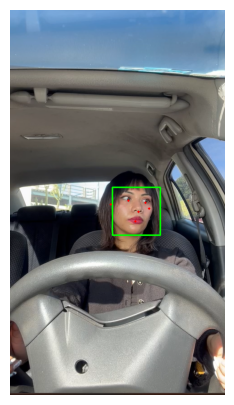

In [15]:
# Ruta a la imagen original
image_path = './Videos/AE/DAFNE1.png'
image = cv2.imread(image_path)

# Asegúrate de que la imagen se haya cargado correctamente
if image is None:
    print("Error al cargar la imagen.")
else:
    # Convertir dimensiones de la imagen a float para cálculos
    height, width, _ = image.shape

    for index, row in df.iterrows():
        # Extraer coordenadas del bounding box
        xmin = int(row['xmin'] * width)
        ymin = int(row['ymin'] * height)
        bbox_width = int(row['width'] * width)
        bbox_height = int(row['height'] * height)

        # Dibujar el bounding box
        cv2.rectangle(image, (xmin, ymin), (xmin + bbox_width, ymin + bbox_height), (0, 255, 0), 2)

        # Dibujar cada landmark
        for i in range(6):  # Ajusta este rango según el número de landmarks almacenados
            # Calcular las coordenadas absolutas de los landmarks
            landmark_x = int(row[f'landmark_{i}_x'] * bbox_width + xmin)
            landmark_y = int(row[f'landmark_{i}_y'] * bbox_height + ymin)

            # Dibujar el landmark
            cv2.circle(image, (landmark_x, landmark_y), 2, (0, 0, 255), -1)

    # Muestra la imagen con los rostros detectados
    plt.figure(figsize=(5, 5))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

#   <font color='#F5BCA9 '> Segmentación</font> de <font color='#CD5C5C '>  Vídeos </font> 



En este codigo se realiza

1. Importación de librerías:

os: para la gestión de archivos y directorios.
moviepy.video.io.ffmpeg_tools: para extraer segmentos de videos usando la herramienta FFmpeg.
pandas: para leer archivos CSV.

2. Funciones auxiliares:

time_to_seconds(time_str): convierte un string de tiempo con formato "HH:MM:SS-HH:MM:SS" o "MM:SS-MM:SS" a una lista de dos números representando los tiempos de inicio y fin en segundos.
ensure_dir(directory): crea un directorio si no existe.

3. Configuración de directorios:

Define un diccionario directories con las rutas a los directorios donde se guardarán los segmentos de video según su categoría.
Crea los directorios si no existen.

4. Función principal para procesar archivos:

process_file(csv_file_path, video_file_path):
Lee el archivo CSV usando Pandas.
Recorre cada categoría de video:
Lee los rangos de tiempo de la categoría del CSV.
Convierte los rangos a segundos usando time_to_seconds.
Extrae los segmentos de video correspondientes usando ffmpeg_extract_subclip:
Genera el nombre del archivo de salida concatenando información del CSV y la categoría.
Llama a ffmpeg_extract_subclip para extraer el segmento y guardarlo en el directorio correspondiente.

5. Proceso principal:

Define el directorio de origen donde se encuentran los archivos CSV y los videos.
Obtiene la lista de archivos CSV en el directorio.
Recorre cada archivo CSV y su video correspondiente:
Construye las rutas completas a los archivos.
Llama a process_file para procesar el CSV y extraer los segmentos del video.

In [16]:
import os
from moviepy.video.io.ffmpeg_tools import ffmpeg_extract_subclip

# Función para convertir tiempos en segundos
def time_to_seconds(time_str):
    if pd.isna(time_str):
        return []
    times = time_str.split('-')
    result = []
    for t in times:
        parts = t.strip().split(':')
        if len(parts) == 2:  # Solo minutos y segundos
            m, s = map(int, parts)
            result.append(m * 60 + s)
        elif len(parts) == 3:  # Horas, minutos y segundos
            h, m, s = map(int, parts)
            result.append(h * 3600 + m * 60 + s)
        else:
            return {}
    return result

# Función para asegurar la existencia del directorio
def ensure_dir(directory):
    if not os.path.exists(directory):
        os.makedirs(directory)

# Directorios para cada categoría
directories = {
    'FRENTE': './Videos/Frente',
    'DERECHA': './Videos/Derecha',
    'IZQUIERDA': './Videos/Izquierda',
    'PALANCA': './Videos/Palanca',
    'RETROVISOR': './Videos/Retrovisor',
}

# Asegurar la existencia de los directorios
for directory in directories.values():
    ensure_dir(directory)

# Función para procesar un archivo .csv y su video correspondiente
def process_file(csv_file_path, video_file_path):
    df = pd.read_csv(csv_file_path)
    for category, directory in directories.items():
        segments = []
        for time_range in df[category]:
            if pd.notna(time_range):
                start_end = time_to_seconds(time_range)
                if start_end:
                    segments.append(start_end)
        for i, (start, end) in enumerate(segments):
            output_path = os.path.join(directory, f'{os.path.splitext(os.path.basename(csv_file_path))[0]}_{category}_segment_{i+1}.mp4')
            ffmpeg_extract_subclip(video_file_path, start, end, targetname=output_path)

# Directorio donde están los archivos .csv y los videos
source_directory = './Videos/Crudos/'

# Listar todos los archivos .csv en el directorio
csv_files = [f for f in os.listdir(source_directory) if f.endswith('.csv')]

# Procesar cada archivo .csv y su video correspondiente
for csv_file in csv_files:
    csv_file_path = os.path.join(source_directory, csv_file)
    video_file_path = os.path.join(source_directory, os.path.splitext(csv_file)[0] + '.MP4')
    process_file(csv_file_path, video_file_path)


Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful
Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful
Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful
Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful
Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful
Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful
Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful
Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful
Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful
Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful
Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful
Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful
Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful
Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful
Moviepy - Running:
>>> "+ " ".join

#   <font color='#F5BCA9 '> Extracción y </font><font color='#CD5C5C '> Selección de </font> Características 


1. Inicialización de MediaPipe Face Detection:

Importa la biblioteca MediaPipe Face Detection y crea un objeto face_detection con varios parámetros:
model_selection=1: selecciona el modelo de detección precisa.
min_detection_confidence=0.5: define la confianza mínima requerida para considerar una detección (50%).

2. Función para procesar un video:

Define una función process_video que toma como parámetros la ruta del video y una lista vacía all_detections para almacenar los resultados.
Abre el video usando cv2.VideoCapture. Si no se abre correctamente, muestra un mensaje de error y finaliza la función.
Recorre los frames del video utilizando un bucle while:
Lee un frame del video.
Convierte el frame a formato RGB (requerido por MediaPipe).
Detecta rostros en el frame usando face_detection.process.
Si se detectan rostros:
Recorre cada detección:
Extrae las coordenadas del bounding box relativo del rostro.
Crea un diccionario vacío landmarks_relative para almacenar las coordenadas relativas de los landmarks faciales.
Recorre los landmarks detectados para cada rostro:
Extrae las coordenadas relativas de cada landmark.
Agrega las coordenadas al diccionario landmarks_relative.
Crea un diccionario detection_data con información del video y la detección:
Nombre del video
Coordenadas del bounding box
Combina el diccionario detection_data con el diccionario de landmarks relativos.
Agrega el diccionario combinado a la lista all_detections.
Libera el capturador de video.

In [17]:
# Inicializar MediaPipe Face Detection
mp_face_detection = mp.solutions.face_detection
face_detection = mp_face_detection.FaceDetection(model_selection=1, min_detection_confidence=0.5)

# Función para procesar un único video
def process_video(video_path, all_detections):
    cap = cv2.VideoCapture(video_path)
    if not cap.isOpened():
        print(f"Error al cargar el video {video_path}.")
        return
    
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break

        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        results = face_detection.process(frame_rgb)

        if results.detections:
            for detection in results.detections:
                bboxC = detection.location_data.relative_bounding_box
                xmin = bboxC.xmin
                ymin = bboxC.ymin
                width = bboxC.width
                height = bboxC.height

                landmarks_relative = {}
                keypoints = detection.location_data.relative_keypoints

                for i, keypoint in enumerate(keypoints):
                    relative_x = keypoint.x
                    relative_y = keypoint.y

                    landmarks_relative[f"landmark_{i}_x"] = relative_x
                    landmarks_relative[f"landmark_{i}_y"] = relative_y
                
                detection_data = {
                    "video_name": os.path.basename(video_path),
                    "xmin": xmin,
                    "ymin": ymin,
                    "width": width,
                    "height": height,
                }
                
                detection_data.update(landmarks_relative)
                all_detections.append(detection_data)

    cap.release()

In [18]:
# Directorio que contiene los videos
video_dir = "Videos/Derecha"
all_detections = []

# Procesar cada video en el directorio y acumular los resultados
for video_file in os.listdir(video_dir):
    video_path = os.path.join(video_dir, video_file)
    if os.path.isfile(video_path) and video_path.endswith('.mp4'):
        process_video(video_path, all_detections)

# Guardar todos los datos acumulados en un único archivo CSV
csv_filename = os.path.join(video_dir, "landmarks_Derecha.csv")
df = pd.DataFrame(all_detections)

# Agrega el nombre de la clase la cual se quiere agregar al archivo final de .csv
class_name = "Derecha"  
df['class'] = class_name   

df.to_csv(csv_filename, index=False)
print(f"Todas las detecciones y puntos de referencia relativos de todos los videos se almacenan en: {csv_filename}")

Todas las detecciones y puntos de referencia relativos de todos los videos se almacenan en: Videos/Derecha\landmarks_Derecha.csv


In [19]:
# Directorio que contiene los videos
video_dir = "Videos/Izquierda"
all_detections = []

# Procesar cada video en el directorio y acumular los resultados
for video_file in os.listdir(video_dir):
    video_path = os.path.join(video_dir, video_file)
    if os.path.isfile(video_path) and video_path.endswith('.mp4'):
        process_video(video_path, all_detections)

# Guardar todos los datos acumulados en un único archivo CSV
csv_filename = os.path.join(video_dir, "landmarks_Izquierda.csv")
df = pd.DataFrame(all_detections)

# Agrega el nombre de la clase la cual se quiere agregar al archivo final de .csv
class_name = "Izquierda"  
df['class'] = class_name   

df.to_csv(csv_filename, index=False)
print(f"Todas las detecciones y puntos de referencia relativos de todos los videos se almacenan en: {csv_filename}")

Todas las detecciones y puntos de referencia relativos de todos los videos se almacenan en: Videos/Izquierda\landmarks_Izquierda.csv


In [20]:
# Directorio que contiene los videos
video_dir = "Videos/Frente"
all_detections = []

# Procesar cada video en el directorio y acumular los resultados
for video_file in os.listdir(video_dir):
    video_path = os.path.join(video_dir, video_file)
    if os.path.isfile(video_path) and video_path.endswith('.mp4'):
        process_video(video_path, all_detections)

# Guardar todos los datos acumulados en un único archivo CSV
csv_filename = os.path.join(video_dir, "landmarks_Frente.csv")
df = pd.DataFrame(all_detections)

# Agrega el nombre de la clase la cual se quiere agregar al archivo final de .csv
class_name = "Frente"  
df['class'] = class_name   


df.to_csv(csv_filename, index=False)
print(f"Todas las detecciones y puntos de referencia relativos de todos los videos se almacenan en: {csv_filename}")

Todas las detecciones y puntos de referencia relativos de todos los videos se almacenan en: Videos/Frente\landmarks_Frente.csv


In [21]:
# Directorio que contiene los videos
video_dir = "Videos/Retrovisor"
all_detections = []

# Procesar cada video en el directorio y acumular los resultados
for video_file in os.listdir(video_dir):
    video_path = os.path.join(video_dir, video_file)
    if os.path.isfile(video_path) and video_path.endswith('.mp4'):
        process_video(video_path, all_detections)

# Guardar todos los datos acumulados en un único archivo CSV
csv_filename = os.path.join(video_dir, "landmarks_Retrovisor.csv")
df = pd.DataFrame(all_detections)

# Agrega el nombre de la clase la cual se quiere agregar al archivo final de .csv
class_name = "Retrovisor"  
df['class'] = class_name   


df.to_csv(csv_filename, index=False)
print(f"Todas las detecciones y puntos de referencia relativos de todos los videos se almacenan en: {csv_filename}")

Todas las detecciones y puntos de referencia relativos de todos los videos se almacenan en: Videos/Retrovisor\landmarks_Retrovisor.csv


In [22]:
# Directorio que contiene los videos
video_dir = "Videos/Palanca"
all_detections = []

# Procesar cada video en el directorio y acumular los resultados
for video_file in os.listdir(video_dir):
    video_path = os.path.join(video_dir, video_file)
    if os.path.isfile(video_path) and video_path.endswith('.mp4'):
        process_video(video_path, all_detections)

# Guardar todos los datos acumulados en un único archivo CSV
csv_filename = os.path.join(video_dir, "landmarks_Palanca.csv")
df = pd.DataFrame(all_detections)

# Agrega el nombre de la clase la cual se quiere agregar al archivo final de .csv
class_name = "Palanca"  
df['class'] = class_name   


df.to_csv(csv_filename, index=False)
print(f"Todas las detecciones y puntos de referencia relativos de todos los videos se almacenan en: {csv_filename}")

Todas las detecciones y puntos de referencia relativos de todos los videos se almacenan en: Videos/Palanca\landmarks_Palanca.csv


#  <font color='#F5BCA9 '> Construcción  </font> de <font color='#CD5C5C '> DataFrame </font> 


Convertimos los archivos .csv en dataframes 

In [23]:
df_palanca = pd.read_csv("./Videos/Palanca/landmarks_Palanca.csv")
df_derecha = pd.read_csv("./Videos/Derecha/landmarks_Derecha.csv")
df_izquierda = pd.read_csv("./Videos/Izquierda/landmarks_Izquierda.csv")
df_retrovisor = pd.read_csv("./Videos/Retrovisor/landmarks_Retrovisor.csv")
df_frente = pd.read_csv("./Videos/Frente/landmarks_Frente.csv")

Unimos todos los DataFrames

In [24]:
df = pd.concat([df_palanca, df_derecha, df_izquierda, df_retrovisor, df_frente], ignore_index=True)

Analizamos la cabecera de nuestra dataframe 

In [25]:
df_palanca.head()

,video_name,xmin,ymin,width,height,landmark_0_x,landmark_0_y,landmark_1_x,landmark_1_y,landmark_2_x,landmark_2_y,landmark_3_x,landmark_3_y,landmark_4_x,landmark_4_y,landmark_5_x,landmark_5_y,class
0,ANDRES_PALANCA_segment_1.mp4,0.260570,0.352745,0.348064,0.196999,0.361600,0.418973,0.505582,0.414138,0.435599,0.459764,0.436211,0.497131,0.285559,0.440318,0.591620,0.432829,Palanca
1,ANDRES_PALANCA_segment_1.mp4,0.256826,0.351454,0.352898,0.199729,0.359441,0.418553,0.504369,0.413221,0.433198,0.459207,0.434356,0.497465,0.284826,0.440944,0.592623,0.432270,Palanca
2,ANDRES_PALANCA_segment_1.mp4,0.257007,0.350732,0.353600,0.200139,0.360680,0.416661,0.505158,0.413480,0.433995,0.458890,0.432367,0.496892,0.281802,0.437715,0.589144,0.433410,Palanca
3,ANDRES_PALANCA_segment_1.mp4,0.256473,0.350501,0.355686,0.201326,0.361443,0.417248,0.505133,0.414961,0.435225,0.461023,0.432095,0.498382,0.278619,0.436687,0.585279,0.434174,Palanca
4,ANDRES_PALANCA_segment_1.mp4,0.258163,0.352163,0.350191,0.198212,0.361153,0.417514,0.503540,0.415144,0.434851,0.459779,0.431995,0.497082,0.277590,0.438213,0.583130,0.435344,Palanca


Guardamos el nuevo dataframe en un .csv


In [26]:
df.to_csv("data_completo.csv")

#  <font color='#F5BCA9 '> ¡¡¡Ejecutar  </font> a partir<font color='#CD5C5C '> de aquí!!</font> 


##  <font color='#F5BCA9 '> Análisis </font> Exploratorio<font color='#CD5C5C '> DataFrame </font> 


In [27]:
from sklearn.preprocessing import LabelEncoder

In [28]:
#Creamos una instacia
label_encoder = LabelEncoder()
#
label_encoder.fit(df['class'])
#
df['clase'] = label_encoder.transform(df['class'])

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10879 entries, 0 to 10878
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   video_name    10879 non-null  object 
 1   xmin          10879 non-null  float64
 2   ymin          10879 non-null  float64
 3   width         10879 non-null  float64
 4   height        10879 non-null  float64
 5   landmark_0_x  10879 non-null  float64
 6   landmark_0_y  10879 non-null  float64
 7   landmark_1_x  10879 non-null  float64
 8   landmark_1_y  10879 non-null  float64
 9   landmark_2_x  10879 non-null  float64
 10  landmark_2_y  10879 non-null  float64
 11  landmark_3_x  10879 non-null  float64
 12  landmark_3_y  10879 non-null  float64
 13  landmark_4_x  10879 non-null  float64
 14  landmark_4_y  10879 non-null  float64
 15  landmark_5_x  10879 non-null  float64
 16  landmark_5_y  10879 non-null  float64
 17  class         10879 non-null  object 
 18  clase         10879 non-nu

Eliminamos las columnas de Video_name, y la columna de Class que contiene las clases en caracteres 

In [30]:
df = df.drop(columns=["video_name", "class"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10879 entries, 0 to 10878
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   xmin          10879 non-null  float64
 1   ymin          10879 non-null  float64
 2   width         10879 non-null  float64
 3   height        10879 non-null  float64
 4   landmark_0_x  10879 non-null  float64
 5   landmark_0_y  10879 non-null  float64
 6   landmark_1_x  10879 non-null  float64
 7   landmark_1_y  10879 non-null  float64
 8   landmark_2_x  10879 non-null  float64
 9   landmark_2_y  10879 non-null  float64
 10  landmark_3_x  10879 non-null  float64
 11  landmark_3_y  10879 non-null  float64
 12  landmark_4_x  10879 non-null  float64
 13  landmark_4_y  10879 non-null  float64
 14  landmark_5_x  10879 non-null  float64
 15  landmark_5_y  10879 non-null  float64
 16  clase         10879 non-null  int32  
dtypes: float64(16), int32(1)
memory usage: 1.4 MB


Una vez que hemos eliminado esas columnas, procedemos a ver si los datos estan equilibrados o no 

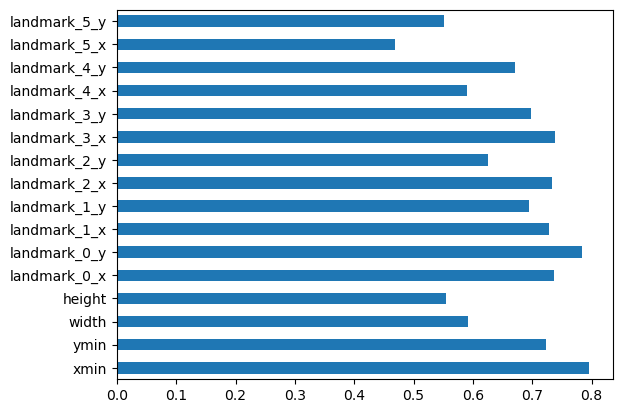

In [31]:
from sklearn.feature_selection import mutual_info_classif
import matplotlib.pyplot as plt

X = df.iloc[:, 0:-1]
y = df.iloc[:, -1]

X_new = mutual_info_classif(X, y)
feat_imp = pd.Series(X_new, df.columns[0:len(df.columns)-1])
feat_imp.plot(kind='barh')
plt.show()

Observamos que si bien las features de width y landmark_4_x son las que menos tienen datos, la diferencia con respecto al retos de features no es abismal, por lo que se procede con los datos completos.

En este conjunto de datos, la consistencia en la mediana y el rango intercuartil sugiere que, aunque hay variabilidad entre las características, muchos tienen una distribución de datos similar. La simetría alrededor de la mediana indica que no hay un sesgo significativo alto o bajo en la mayoría de las características. Sin embargo, la presencia de valores atípicos podría influir en la media y la varianza, y podría ser motivo de exclusión o ajuste durante la preparación de datos para análisis estadísticos o modelos predictivos, dependiendo de la naturaleza del estudio y la relevancia de los valores extremos para el fenómeno bajo investigación.

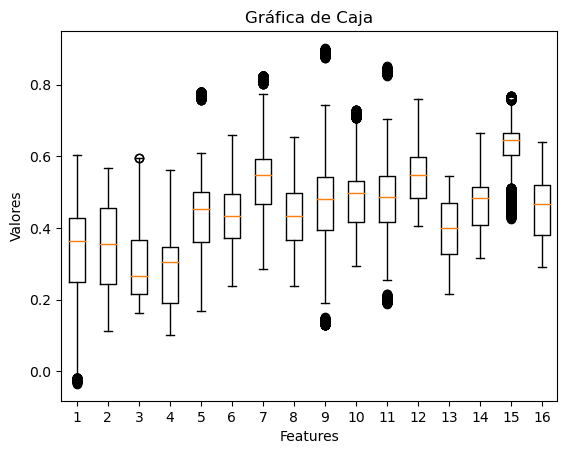

In [32]:
import matplotlib.pyplot as plt
import numpy as np

# Crear la gráfica de caja
plt.boxplot(X)

# Añadir títulos y etiquetas 
plt.title('Gráfica de Caja')
plt.ylabel('Valores')
plt.xlabel('Features')

# Mostrar la gráfica
plt.show()

##  <font color='#F5BCA9 '> Reducción </font> de <font color='#CD5C5C '> Dimensionalidad </font> 


In [33]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.manifold import TSNE
from umap import UMAP
from sklearn.decomposition import PCA

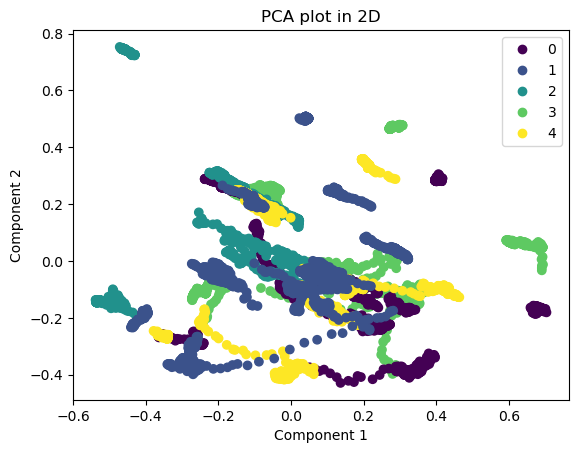

In [34]:
X_PCA = PCA(n_components=2).fit_transform(X)

scatter = plt.scatter(X_PCA[:,0], X_PCA[:,1], c=y)
plt.title('PCA plot in 2D')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.legend(*scatter.legend_elements())
plt.show()


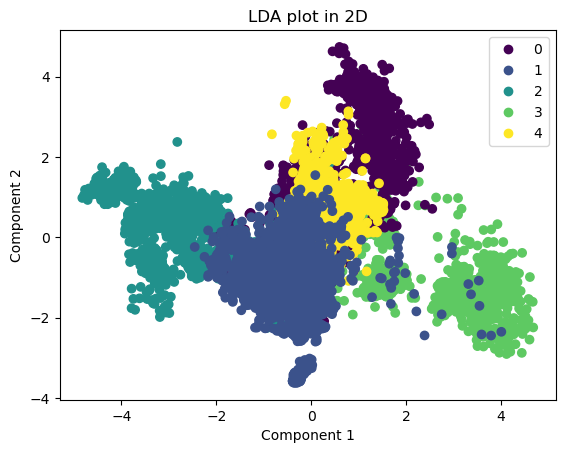

In [35]:
X_LDA = LDA(n_components=2).fit_transform(X,y)

scatter = plt.scatter(X_LDA[:,0], X_LDA[:,1], c=y)
plt.title('LDA plot in 2D')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.legend(*scatter.legend_elements())
plt.show()

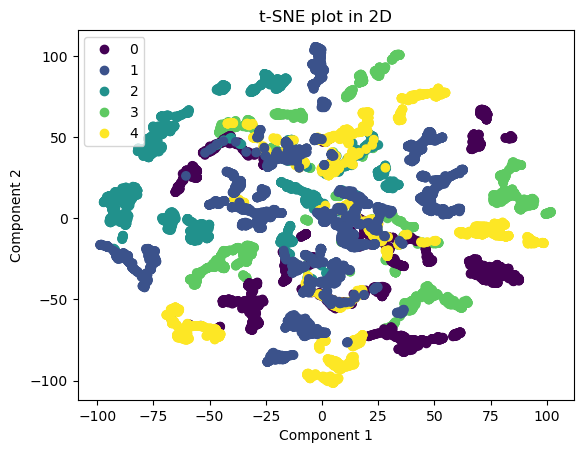

In [36]:
X_TSNE = TSNE().fit_transform(X)

scatter = plt.scatter(X_TSNE[:,0], X_TSNE[:,1], c=y)
plt.title('t-SNE plot in 2D')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.legend(*scatter.legend_elements())
plt.show()

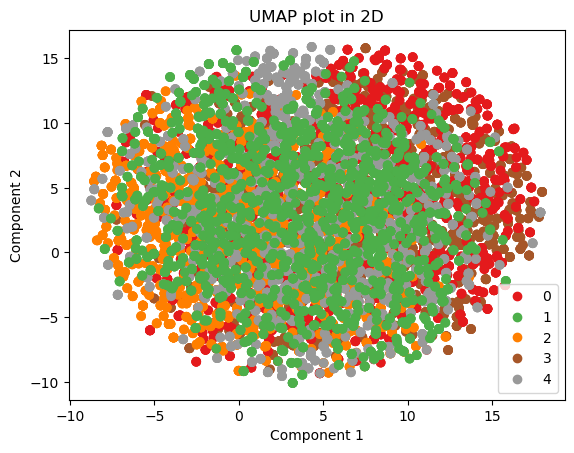

In [37]:
X_UMAP = UMAP(n_neighbors=2, min_dist=0.1, metric='correlation').fit_transform(X)

scatter = plt.scatter(X_UMAP[:,0], X_UMAP[:,1], c=y, cmap='Set1')
plt.title('UMAP plot in 2D')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.legend(*scatter.legend_elements())
plt.show()

Análisis de PCA, LDA, t-SNE, UMAP:

Concentración de puntos: Se observa una gran concentración de puntos en la región central de las gráficas. Esto indica que hay una gran cantidad de entidades con características similares. Grupos de puntos: Se pueden observar algunos grupos de puntos más o menos dispersos en la gráfica. Sobre todo en la grafica obtenida con PCA.
Separación de clases LDA: Se observa una clara separación entre las dos clases en la gráfica. Esto indica que el LDA ha sido capaz de identificar características que discriminan bien entre las clases. Dispersión de las clases: La clase PALANCA parece ser más dispersa que la clase FRENTE. Esto podría indicar que la clase verde tiene una mayor variabilidad interna. Puntos atípicos: Se observa un punto azul que se encuentra alejado del resto de la clase FRENTE. Este punto podría ser un outlier o una entidad mal clasificada.

El LDA ha sido capaz de separar las dos clases de manera efectiva.
La clase verde tiene una mayor variabilidad interna que la clase azul.
Hay un posible outlier en la clase azul.

#  <font color='#F5BCA9 '> Construcción y </font><font color='#CD5C5C '> Evaluación de </font> Modelos


##  <font color='#F5BCA9 '> Entrenamiento y prueba </font>

In [38]:
# Importa la biblioteca
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score, recall_score, confusion_matrix
import seaborn as sns

In [39]:
from sklearn.model_selection import train_test_split

Aquí separamos del total de nuestros datos. Al conjunto de entrenamiento se le asigna el 75% de las muestras, mientras que para el conjunto de prueba se destina el 25% del total de las muestras

In [40]:
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=0, shuffle=True)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((8159, 16), (8159,), (2720, 16), (2720,))

### 1 <font color='green'>Árboles de Decisión</font>  


Los árboles de decisión son un tipo de algoritmo de aprendizaje automático supervisado que se utiliza para la clasificación y la regresión. Los árboles de decisión construyen un modelo de predicción a partir de un conjunto de datos de entrenamiento. El modelo se compone de un conjunto de reglas que se pueden utilizar para predecir el valor de una variable objetivo para una nueva observación.

In [41]:
clf1 = DecisionTreeClassifier()
clf1 = clf1.fit(x_train,y_train)
y_pred = clf1.predict(x_test)

print("Decision tree score: {:.3f}".format(clf1.score(x_test, y_test)))

Decision tree score: 0.934


Creamos la matriz de confusión 

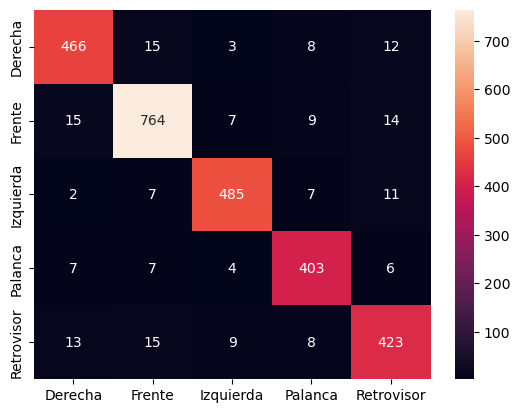

In [42]:
#Crea la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Visualiza la matriz de confusión con nombres de las clases
sns.heatmap(cm, annot=True, xticklabels=["Derecha", "Frente", "Izquierda", "Palanca", "Retrovisor"], yticklabels=["Derecha", "Frente", "Izquierda", "Palanca", "Retrovisor"], fmt='.0f');



### 2 <font color='#EE8983 '>Aprendizaje Bayesiano</font>

El aprendizaje bayesiano es un enfoque de aprendizaje automático que utiliza la teoría de la probabilidad bayesiana para hacer inferencias sobre los datos. La teoría de la probabilidad bayesiana se basa en la idea de que la probabilidad de un evento depende de la información previa que se tiene sobre ese evento.

In [43]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score


clf2 = GaussianNB()
clf2 = clf2.fit(x_train, y_train)
y_pred = clf2.predict(x_test)
print("Gaussian Naive Bayes score: {:.3f}".format(accuracy_score(y_test, y_pred)))

Gaussian Naive Bayes score: 0.464


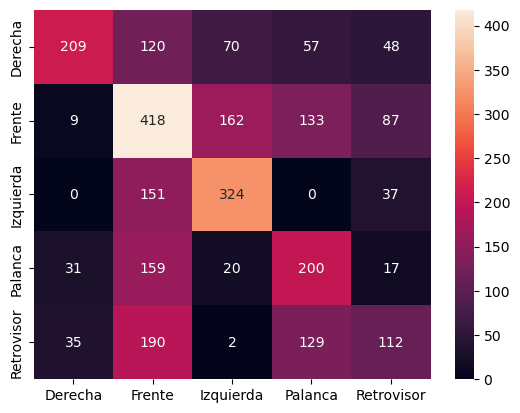

In [44]:
#Crea la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Visualiza la matriz de confusión con nombres de las clases
sns.heatmap(cm, annot=True, xticklabels=["Derecha", "Frente", "Izquierda", "Palanca", "Retrovisor"], yticklabels=["Derecha", "Frente", "Izquierda", "Palanca", "Retrovisor"], fmt='.0f');



### 3  <font color='#8B68D6 '>Aprendizaje basado en instancias </font>

El aprendizaje basado en instancias es un enfoque de aprendizaje automático en el que el modelo se construye a partir de un conjunto de datos de entrenamiento que contiene ejemplos de datos etiquetados. El modelo aprende a clasificar nuevas observaciones comparando las características de la observación con las características de las observaciones de entrenamiento.

In [45]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

clf3 = KNeighborsClassifier(40)
clf3 = clf3.fit(x_train, y_train)
y_pred = clf3.predict(x_test)
print("K-Nearest Neighbors score: {:.3f}".format(accuracy_score(y_test, y_pred)))

K-Nearest Neighbors score: 0.906


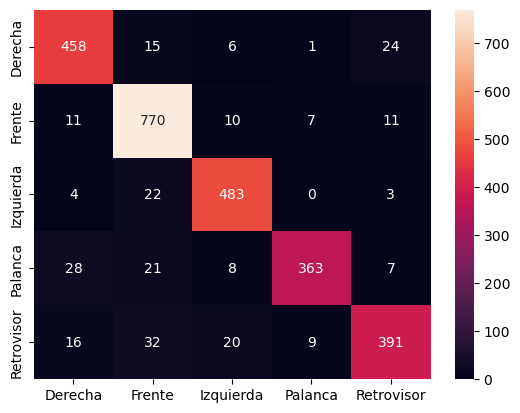

In [46]:
#Crea la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Visualiza la matriz de confusión con nombres de las clases
sns.heatmap(cm, annot=True, xticklabels=["Derecha", "Frente", "Izquierda", "Palanca", "Retrovisor"], yticklabels=["Derecha", "Frente", "Izquierda", "Palanca", "Retrovisor"], fmt='.0f');



### 4 <font color='#B04ECB'>Máquinas de soporte vectorial (SVM)</font> 

In [47]:
from sklearn.svm import SVC

clf4 = SVC(kernel="linear", C=0.025, random_state=12)
clf4 = clf4.fit(x_train, y_train)
y_pred = clf4.predict(x_test)
print("SVM score: {:.3f}".format(accuracy_score(y_test, y_pred)))

SVM score: 0.550


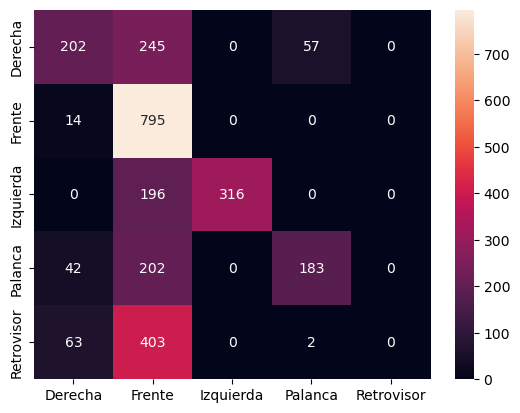

In [48]:
#Crea la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Visualiza la matriz de confusión con nombres de las clases
sns.heatmap(cm, annot=True, xticklabels=["Derecha", "Frente", "Izquierda", "Palanca", "Retrovisor"], yticklabels=["Derecha", "Frente", "Izquierda", "Palanca", "Retrovisor"], fmt='.0f');



### 5 <font color='#4E7FCB '>Redes neuronales</font>

El proceso de aprendizaje de las redes neuronales se llama entrenamiento. El entrenamiento se lleva a cabo utilizando un algoritmo de aprendizaje automático. Los algoritmos de aprendizaje automático se utilizan para ajustar los pesos y los sesgos de los nodos de la red neuronal. Los pesos y los sesgos controlan cómo se procesan las entradas en la red neuronal.

In [49]:
from sklearn.neural_network import MLPClassifier

clf5 = MLPClassifier(alpha=1, max_iter=1000, random_state=80)
clf5 = clf5.fit(x_train, y_train)
y_pred = clf5.predict(x_test)
print("Neural Network score: {:.3f}".format(accuracy_score(y_test, y_pred)))

Neural Network score: 0.711


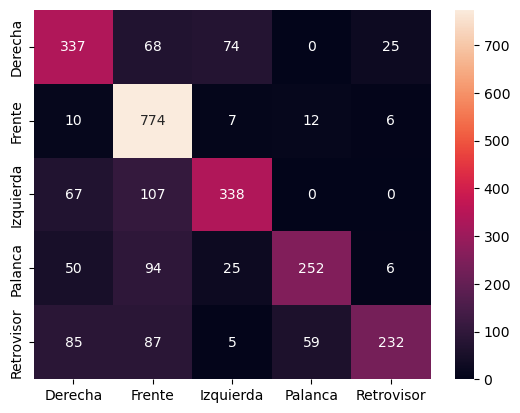

In [50]:
#Crea la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Visualiza la matriz de confusión con nombres de las clases
sns.heatmap(cm, annot=True, xticklabels=["Derecha", "Frente", "Izquierda", "Palanca", "Retrovisor"], yticklabels=["Derecha", "Frente", "Izquierda", "Palanca", "Retrovisor"], fmt='.0f');



### 6 <font color='#DF5B91 '>AdaBoost</font>
AdaBoost funciona entrenando un conjunto de clasificadores débiles, cada uno de los cuales se enfoca en las observaciones que fueron mal clasificadas por los clasificadores anteriores. Los pesos de las observaciones se actualizan después de cada iteración para que los clasificadores futuros se centren en las observaciones que son más difíciles de clasificar.

In [51]:
from sklearn.ensemble import AdaBoostClassifier

clf6 = AdaBoostClassifier(random_state=42)
clf6 = clf6.fit(x_train, y_train)
y_pred = clf6.predict(x_test)
print("AdaBoost score: {:.3f}".format(accuracy_score(y_test, y_pred)))

AdaBoost score: 0.612


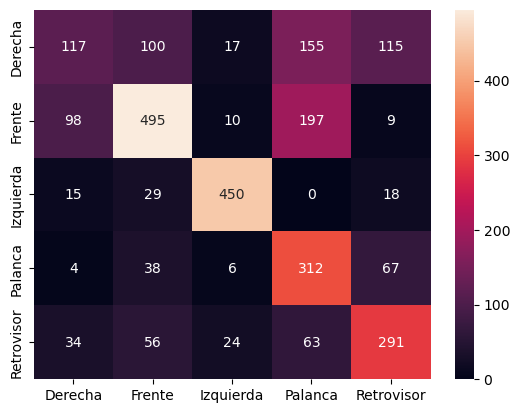

In [52]:
#Crea la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Visualiza la matriz de confusión con nombres de las clases
sns.heatmap(cm, annot=True, xticklabels=["Derecha", "Frente", "Izquierda", "Palanca", "Retrovisor"], yticklabels=["Derecha", "Frente", "Izquierda", "Palanca", "Retrovisor"], fmt='.0f');



### 7 <font color='#5B6FDF '>Random Forest</font>


Random Forest es un algoritmo de aprendizaje automático supervisado que se utiliza para la clasificación y la regresión. Random Forest es un conjunto de árboles de decisión aleatorios.
Random Forest funciona construyendo un conjunto de árboles de decisión aleatorios. Cada árbol de decisión se construye sobre un subconjunto aleatorio de los datos de entrenamiento. Las observaciones que se utilizan para construir un árbol de decisión son seleccionadas al azar sin reemplazo.

In [53]:
from sklearn.ensemble import RandomForestClassifier

clf7 = RandomForestClassifier()
clf7 = clf7.fit(x_train, y_train)
y_pred = clf7.predict(x_test)
print("Random Forest score: {:.3f}".format(accuracy_score(y_test, y_pred)))

Random Forest score: 0.957


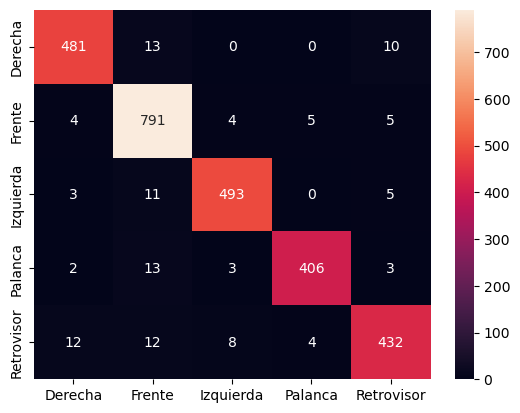

In [54]:
#Crea la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Visualiza la matriz de confusión con nombres de las clases
sns.heatmap(cm, annot=True, xticklabels=["Derecha", "Frente", "Izquierda", "Palanca", "Retrovisor"], yticklabels=["Derecha", "Frente", "Izquierda", "Palanca", "Retrovisor"], fmt='.0f');



El clasificador Random Forest presenta un buen rendimiento general, con una alta precisión para las clases "Derecha", "Frente" e "Izquierda".
Se observa un número considerable de falsos positivos para la clase "Palanca", donde 15 casos fueron clasificados erróneamente como "Palanca" cuando en realidad eran "Frente".
La clase "Retrovisor" tiene la menor precisión, con 274 falsos negativos y 158 falsos positivos.

### 8 <font color='#5B6FDF '>QDA</font>

QDA, o Quadratic Discriminant Analysis, es un algoritmo de clasificación supervisado que se utiliza para clasificar las observaciones en diferentes categorías. QDA es un modelo probabilístico que se basa en la teoría de la probabilidad bayesiana.
QDA es un algoritmo robusto que es menos propenso al sobreajuste que otros algoritmos de clasificación. QDA también puede manejar datos complejos o no lineales.

In [55]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

clf8 = QuadraticDiscriminantAnalysis()
clf8 = clf8.fit(x_train, y_train)
y_pred = clf8.predict(x_test)
print("QDA score: {:.3f}".format(accuracy_score(y_test, y_pred)))

QDA score: 0.865


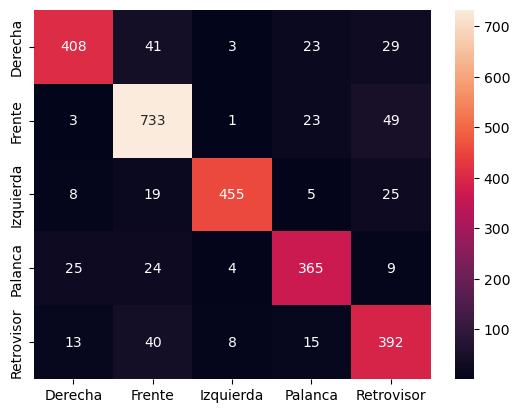

In [56]:
#Crea la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Visualiza la matriz de confusión con nombres de las clases
sns.heatmap(cm, annot=True, xticklabels=["Derecha", "Frente", "Izquierda", "Palanca", "Retrovisor"], yticklabels=["Derecha", "Frente", "Izquierda", "Palanca", "Retrovisor"], fmt='.0f');



### 9 <font color='#5B6FBF '>RBF SVM</font>

RBF SVM, o Radial Basis Function Support Vector Machine, es un algoritmo de aprendizaje automático supervisado que se utiliza para la clasificación y la regresión. RBF SVM es un tipo de máquina de soporte vectorial (SVM) que utiliza una función de núcleo radial para mapear los datos de entrada a un espacio de características de mayor dimensión.
RBF SVM funciona encontrando el hiperplano que separa mejor las observaciones de diferentes categorías en el espacio de características de mayor dimensión. El hiperplano es una línea o una superficie que divide el espacio de características en dos partes, una para cada categoría.

In [57]:
from sklearn.gaussian_process.kernels import RBF

clf9 = SVC(kernel='rbf')
clf9 = clf9.fit(x_train, y_train)
y_pred = clf9.predict(x_test)
print("RBF SVM score: {:.3f}".format(accuracy_score(y_test, y_pred)))

RBF SVM score: 0.844


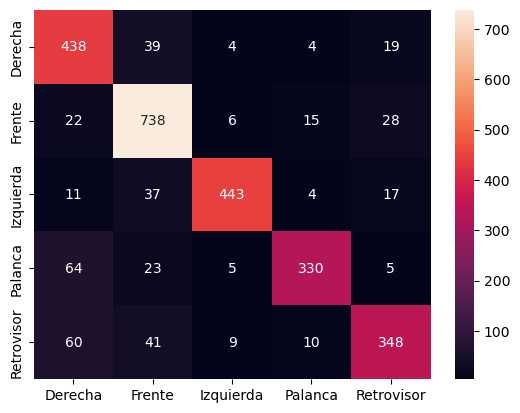

In [58]:
#Crea la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Visualiza la matriz de confusión con nombres de las clases
sns.heatmap(cm, annot=True, xticklabels=["Derecha", "Frente", "Izquierda", "Palanca", "Retrovisor"], yticklabels=["Derecha", "Frente", "Izquierda", "Palanca", "Retrovisor"], fmt='.0f');



##  <font color='#5AABF '>Resultados Clasificadores</font>



Observemos que los clasificadores con mejores desempeños de los 9 que se evaluaron fueron:
1. Random Forest con un score de 0.961
2. Aprendizaje basado en instancias con un score de 0.906
3. QDA con un score de 0.853


Los resultados de la evaluación de los 9 clasificadores muestran que Random Forest es el que tiene el mejor desempeño, con un score de 0.961. Esto significa que el clasificador es capaz de clasificar correctamente el 96,1% de los datos de prueba.

El segundo clasificador con mejor desempeño es Aprendizaje basado en instancias, con un score de 0.906. El tercer clasificador es QdA, con un score de 0.853.

Teniendo en cuenta estos resultados, se decidió utilizar el clasificador Random Forest para entrenar todos los datos y así emplearlo en la validación externa.

La validación externa es un proceso que se utiliza para evaluar el desempeño de un clasificador en datos que no se utilizaron para entrenarlo. Este proceso es importante para garantizar que el clasificador sea capaz de generalizar bien a nuevos datos.

#  <font color='#F5BCA9 '> Reentrenamiento del </font><font color='#CD5C5C '> Mejor Modelo: </font> Random Forest


Reentrenamos el modelo con el mejor clasificador con todos los datos. El mejor clasificador fue Random Forest.


Nota: Al no haber obtenido una buena clasificación en la validación externa se procedio a cambiar los clasificadores en el siguiente orden: KNN, Naive bayes, Suport Vector Machine, y por último Árboles de decisión. Al no tener ninguna mejora en la clasificación para la validación externa se decidió regresar a Random Forest  

In [59]:
clfF = RandomForestClassifier()
clfF = clfF.fit(X, y)

#  <font color='#F5BCA9 '> Validación </font><font color='#CD5C5C '> Externa </font> 


A continuación se presenta el código para realizar la validación externa en vivo. La cual, como adelanto no tuvo éxito. 

In [60]:
import cv2
import mediapipe as mp
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import warnings

warnings.simplefilter("ignore")

# Inicialización de MediaPipe para la detección de rostros
mp_face_detection = mp.solutions.face_detection
mp_drawing = mp.solutions.drawing_utils



# Función para la extracción de características
def extract_features(detection, image_width, image_height):
    bboxC = detection.location_data.relative_bounding_box
    xmin = bboxC.xmin * image_width
    ymin = bboxC.ymin * image_height
    width = bboxC.width * image_width
    height = bboxC.height * image_height

    landmarks_relative = []
    keypoints = detection.location_data.relative_keypoints
    for keypoint in keypoints:
        landmarks_relative.extend([keypoint.x * image_width, keypoint.y * image_height])

    detection_data = [xmin, ymin, width, height] + landmarks_relative
    return detection_data

# Función principal para procesamiento en tiempo real
def main():
    cap = cv2.VideoCapture(0)

    with mp_face_detection.FaceDetection(model_selection=1, min_detection_confidence=0.5) as face_detection:
        while cap.isOpened():
            success, image = cap.read()
            if not success:
                print("Ignoring empty camera frame.")
                continue

            image_height, image_width, _ = image.shape
            image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            image_rgb.flags.writeable = False
            results = face_detection.process(image_rgb)

            image_rgb.flags.writeable = True
            image = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2BGR)

            if results.detections:
                for detection in results.detections:
                    features = extract_features(detection, image_width, image_height)
                    features_array = np.array(features).reshape(1, -1)
                    prediction = clfF.predict(features_array) 
                    label = f"Clase: {prediction[0]}"  
                    mp_drawing.draw_detection(image, detection)
                    cv2.putText(image, label, (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

            cv2.imshow('Face Detection and Classification', image)
            if cv2.waitKey(5) & 0xFF == ord('q'):
                break

    cap.release()
    cv2.destroyAllWindows()

if __name__ == "__main__":
    main()


#  <font color='#F5BCA9 '> Validación </font><font color='#CD5C5C '> Externa </font> pt 2


Al no haber obtenido éxito en la validación externa, se decidió grabar un video adicional para emplearlo como validación externa. No esta de más recalcar que dicho video no fue empleado para el entrenamiento del clasificador.  

##  <font color='#F5BCA9 '> Derecha</font><font color='#CD5C5C '> 0</font> 


Verificamos para DERECHA

In [61]:
df_VEderecha = pd.read_csv("./Videos/VE/VEDerecha.csv")

In [62]:
df_VEderecha.to_csv("data_VE_derecha.csv")

Eliminamos la columna de "video_name"

In [63]:
df_VEderecha = df_VEderecha.drop(columns=["video_name"])


In [64]:
predicciones_externas2 = clfF.predict(df_VEderecha)
print("Las predicciones corresponden a:",predicciones_externas2)

Las predicciones corresponden a: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

##  <font color='#F5BCA9 '> Frente </font><font color='#CD5C5C '> 1</font> 


Verificamos para FRENTE

In [65]:
df_VEfrente = pd.read_csv("./Videos/VE/VEFrente.csv")

In [66]:
df_VEfrente.to_csv("data_VE_frente.csv")

Eliminamos la columna de "video_name"

In [67]:
df_VEfrente = df_VEfrente.drop(columns=["video_name"])


In [68]:
predicciones_externas2 = clfF.predict(df_VEfrente)
print("Las predicciones corresponden a:",predicciones_externas2)

Las predicciones corresponden a: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 3 3 1 1 1 4 4 4 4 3 4 4 3 3 3 3 3 3 1 1 3 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 

##  <font color='#F5BCA9 '> Izquierda </font><font color='#CD5C5C '> 2</font> 


Ahora verificamos para IZQUIERDA

In [69]:
df_VEizquierda = pd.read_csv("./Videos/VE/VEIzquierda.csv")

In [70]:
df_VEizquierda.to_csv("data_VE_izquierda.csv")

Eliminamos la columna de "video_name"

In [71]:
df_VEizquierda = df_VEizquierda.drop(columns=["video_name"])


In [72]:
predicciones_externas2 = clfF.predict(df_VEizquierda)
print("Las predicciones corresponden a:",predicciones_externas2)

Las predicciones corresponden a: [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 

##  <font color='#F5BCA9 '> Palanca</font><font color='#CD5C5C '> 3 </font> 


Al no haber obtenido éxito en la validación externa, se decidió grabar un video adicional para emplearlo como validación externa. No esta de más recalcar que dicho video no fue empleado para el entrenamiento del clasificador.  

In [73]:
df_VEpalanca = pd.read_csv("./Videos/VE/VEPalanca.csv")

Unimos todos los DataFrames

Convertimos el data frame en un archivo .csv 

In [74]:
df_VEpalanca.to_csv("data_VE_palanca.csv")

Eliminamos la columna de "video_name"

In [75]:
df_VEpalanca = df_VEpalanca.drop(columns=["video_name"])

In [76]:
predicciones_externas2 = clfF.predict(df_VEpalanca)
print("Las predicciones corresponden a:",predicciones_externas2)


Las predicciones corresponden a: [3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 0 3 0 0 0 0 0 0 0 0 0 0
 3 3 3 3 3 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 3 0 3 3
 3 3 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 3 3 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0]


##  <font color='#F5BCA9 '> Retrovisor </font><font color='#CD5C5C '> 4</font> 


Ahora verificamos para RETROVISORR

In [77]:
df_VEretrovisor = pd.read_csv("./Videos/VE/VERetrovisor.csv")

In [78]:
df_VEretrovisor.to_csv("data_VE_retrovisor.csv")

Eliminamos la columna de "video_name"

In [79]:
df_VEretrovisor = df_VEretrovisor.drop(columns=["video_name"])


In [80]:
predicciones_externas2 = clfF.predict(df_VEretrovisor)
print("Las predicciones corresponden a:",predicciones_externas2)

Las predicciones corresponden a: [4 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 4 4 4 4 3 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 3 3 3 3 3 3 3 3 4 3
 4 4 4 4 4 4 3 4 4 4 4 3 3 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 

#  <font color='#F5BCA9 '> Discusión </font> y <font color='#CD5C5C '>Conclusión </font> 


Como se observó en la validación cruzada pt 2 notamos que las primeras tres clases las logra clasificar correntamente: 

            0 - Derecha

            1 - Frente 

            2 - Izquierda 

Lo cual tiene bastante sentido, pues son precisamente estas tres clases aquellas que no pueden ser confundidas con ninguna otra. 

Por otro lado observamos que el clasificador no logra identificar correctamente las utimas dos clases, las cuales corresponde a: 

            3 - Palanca 

            4 - Retrovisor 

Esto hace bastante sentido, ya que Palanca puede ser fácilmente confundible como Izquierda, mientras que Retrovisor puede ser confundido como Frente o derecha. 

Analizando la predicción arrojada para Palanca observamos que: Las primeras clasificaciones que otorga son acertadas ya que clasifica correctamente como palanca, pero después de un tiempo clasifica como derecha. Lo cual si bien es incorrecto no es del todo descabellado pensar que se puede dar este suceso. 

Lo que sorprende son las predicciones que arroja Retrovisor ya que observamos que: La primera predicción la realiza correctamente, pero después de solo un instante de tiempo comienza a clasificar como Frente, regresa a clasificar como Retrovisor, cambia nuevamente a Frente y así oscila un par de veces más, clasificando al final correctamente. Estos cambios se pueden deber a que quizá los movimientos son demasiado bruscos o sencillamente que el entrenamiento de los datos no fue correcto. 


Analizando ahora lo ocurrido con la validación externa en vivo, podemos notar claramente que aún realizando cambios bruscos o suaves el modelo no es capaz de modificar las clasificación que se otorga al inicio. Esto puede deberse a que no se estan registrando correctamente los movimientos, ya que inicialmente se tenía la hipótesis de que dicha pausa se debía a que el clasificador elegido estaba haciendo que el modelo se sobreajustara, lo que impedia una correcta clasificación, pero al descartar esta teoría (se descartó modificando los diferentes clasificaodres i.e. SVM, RandomForest, Naive Bayes, etc) se regreso a un estado basal en el que no se explicaba el porqué de esta situación. 
